Student Name: Ruochen Zhao

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from scipy.stats import levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the Excel data file into a DataFrame
file_path = 'INF2178_A2_data.xlsx'
df = pd.read_excel(file_path)
df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [27]:
# Check NaN values in the data set
nan_counts = df.isna().sum()

print(nan_counts)

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


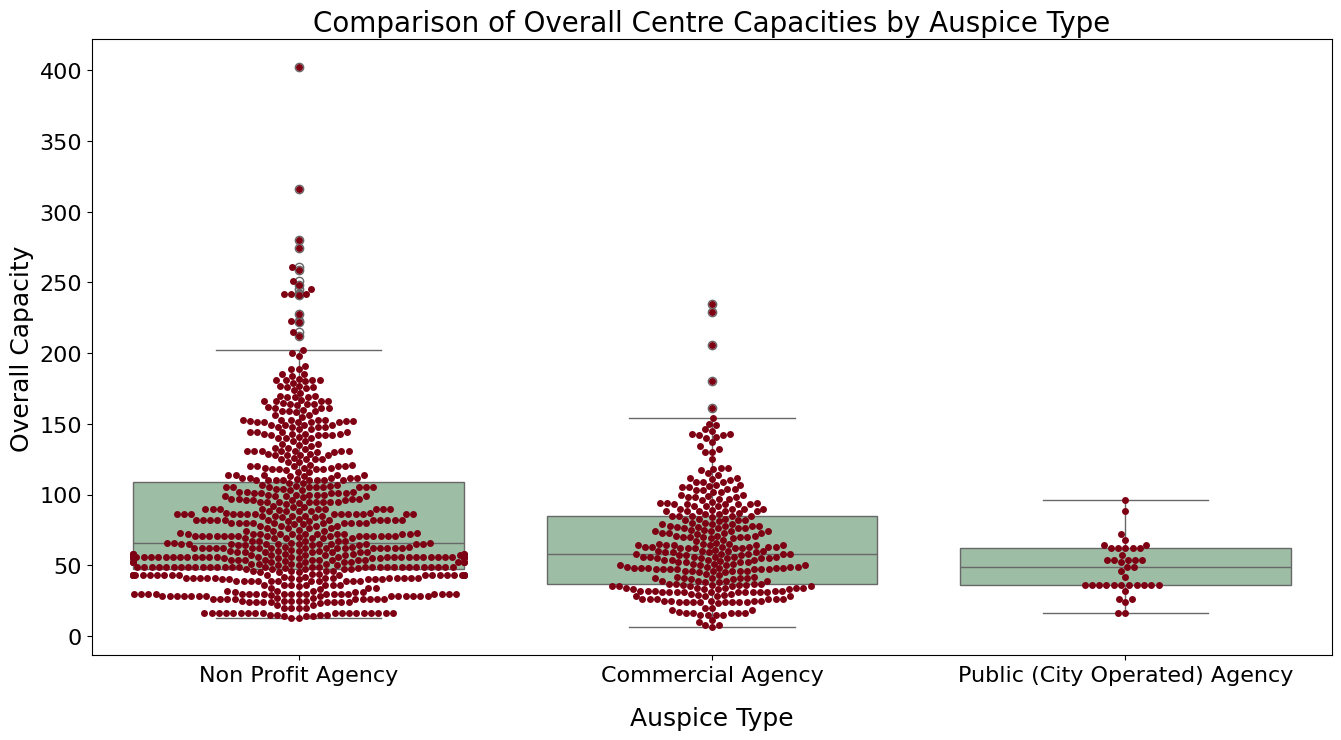

In [29]:
# Comparing centre capacities by auspice with box plots
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, color='#99c2a2')
ax = sns.swarmplot(x="AUSPICE", y="TOTSPACE", data=df, color='#7d0013')

plt.title('Comparison of Overall Centre Capacities by Auspice Type', fontsize=20)
plt.xlabel('Auspice Type', fontsize=18, labelpad=15)
plt.ylabel('Overall Capacity', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [30]:
# Counting the number of centres for each AUSPICE type
sample_sizes = df['AUSPICE'].value_counts()

# Displaying the sample sizes for each AUSPICE group
print(sample_sizes)

Non Profit Agency                703
Commercial Agency                321
Public (City Operated) Agency     39
Name: AUSPICE, dtype: int64


In [ ]:
# One-Way ANOVA

In [31]:
# Perform one-way ANOVA for different kinds of auspice and total space

model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

print(anova_table)

                  sum_sq      df           F         PR(>F)
Intercept   1.355575e+06     1.0  616.153246  1.354042e-107
C(AUSPICE)  9.611211e+04     2.0   21.843051   5.057716e-10
Residual    2.332065e+06  1060.0         NaN            NaN


In [32]:
# Another way to perform the one-way ANOVA
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [33]:
# Perform Tukey's HSD as post-hoc test

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

tukey_results = pairwise_tukeyhsd(endog=df['TOTSPACE'], groups=df['AUSPICE'], alpha=0.05)

# Print the results
print(tukey_results)


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


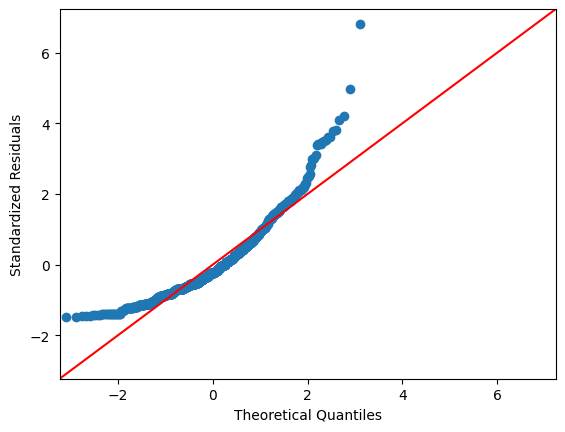

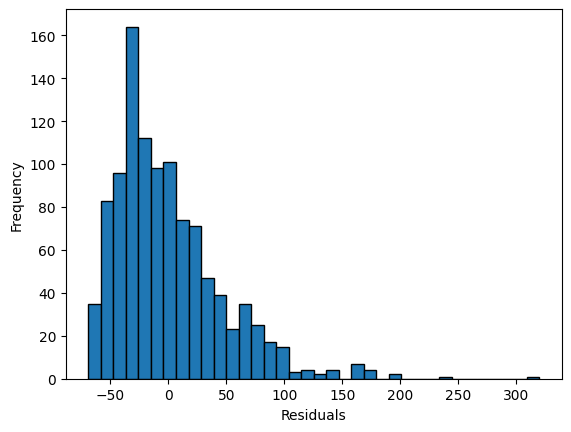

In [34]:
# Plotting QQ plots to check normality assumption
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [35]:
#assumption check 1: Normality check using Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [36]:
#assumption check 2: variances check using Levene's test
# Define auspice groups
aus_groups = df['AUSPICE'].unique()

levene_test = levene(*[df[df['AUSPICE'] == aus_group]['TOTSPACE'] for aus_group in aus_groups])

# Output Levene's test result
print(f"\nLevene's Test: Statistics={levene_test[0]}, p-value={levene_test[1]}")


Levene's Test: Statistics=17.927068524236084, p-value=2.2036889276494363e-08


In [37]:
# Two-Way ANOVA

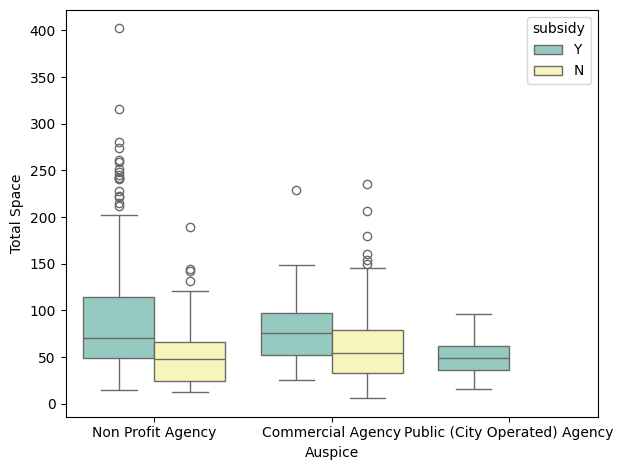

In [38]:
# Draw boxplot to show relationship between auspice and subsidy
ax = sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data=df, palette="Set3")
#ax.tick_params(axis='x', rotation=30)

# Renaming the x-axis and y-axis with more appropriate names
ax.set_xlabel("Auspice")
ax.set_ylabel("Total Space")

plt.tight_layout()
plt.show()

In [39]:
# Perform two-way ANOVA model with interactiion effect between auspice and subsidy
model=ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [40]:
#assumption 1: Normality check using Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9018619656562805 1.5311055543621852e-25


In [41]:
# assumption 2: Variance check using Levene test
# Create a list of unique values for the 'subsidy' and 'AUSPICE' columns
subsidy_groups = df['subsidy'].unique()
auspice_groups = df['AUSPICE'].unique()

# Create a list of 'TOTSPACE' values for each combination of 'subsidy' and 'AUSPICE'
group_data = [df[(df['subsidy'] == sub) & (df['AUSPICE'] == aus)]['TOTSPACE']
              for sub in subsidy_groups for aus in auspice_groups]

# Filter out empty groups which may occur if some combinations do not exist
clean_group_data = [group for group in group_data if not group.empty]

# Perform Levene's test with the filtered group data
levene_test = stats.levene(*clean_group_data)

# Output the result
print(f"\nLevene's Test for two-way ANOVA: Statistics={levene_test[0]}, p-value={levene_test[1]}")



Levene's Test for two-way ANOVA: Statistics=12.984714966192845, p-value=2.51515889994611e-10


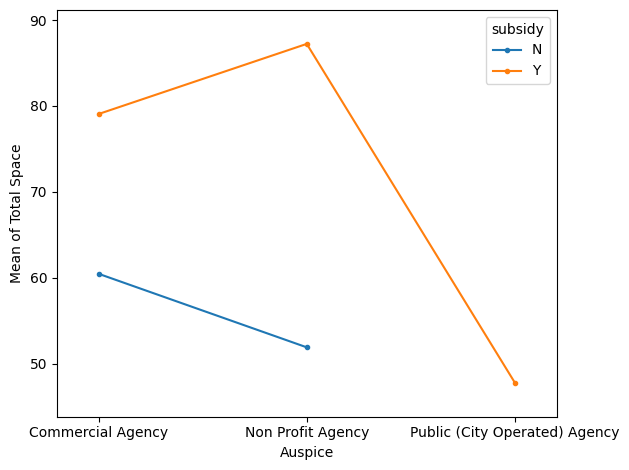

In [42]:
# Interaction plot for subsidy and auspice and their effects on total child care space
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
interaction_plot(x=df['AUSPICE'], trace=df['subsidy'], response=df['TOTSPACE'],colors=['#1F77B4', '#FF7F0E'], ax=ax)
# Renaming the x-axis and y-axis with more appropriate names
ax.set_xlabel("Auspice")
ax.set_ylabel("Mean of Total Space")

plt.tight_layout()
plt.show()


In [43]:
# post hoc test for different auspice
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result_aus = pairwise_tukeyhsd(endog=df['TOTSPACE'], groups=df['AUSPICE'], alpha=0.05)

# Print the results
print(tukey_result_aus.summary())


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


In [44]:
# Just for reference
#res = stats()
#res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
#res.tukey_summary

In [45]:
# Post-hoc test for with or without subsidy using Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result_aus = pairwise_tukeyhsd(endog=df['TOTSPACE'], groups=df['subsidy'], alpha=0.05)

# Print the results
print(tukey_result_aus.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     N      Y  26.2658   0.0 20.3236 32.208   True
--------------------------------------------------


In [46]:
# Post-hoc test for the interaction effect
# Ceate a single group identifier combining 'AUSPICE' and 'subsidy'
df['group'] = df['AUSPICE'].astype(str) + "," + df['subsidy'].astype(str)

# perform the Tukey HSD test using this group identifier
tukey = pairwise_tukeyhsd(endog=df['TOTSPACE'], groups=df['group'], alpha=0.05)

# Print the results
print(tukey.summary())


                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
       group1                    group2             meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------
Commercial Agency,N             Commercial Agency,Y  18.5991 0.0153   2.3733  34.8249   True
Commercial Agency,N             Non Profit Agency,N  -8.5631 0.5037  -23.273   6.1469  False
Commercial Agency,N             Non Profit Agency,Y  26.7646    0.0  17.2862   36.243   True
Commercial Agency,N Public (City Operated) Agency,Y -12.6958 0.4893 -34.2034   8.8119  False
Commercial Agency,Y             Non Profit Agency,N -27.1621 0.0008 -45.9161  -8.4082   True
Commercial Agency,Y             Non Profit Agency,Y   8.1655 0.5712  -6.8401  23.1711  False
Commercial Agency,Y Public (City Operated) Agency,Y -31.2949 0.0045  -55.747  -6.8427   True
Non Profit Agency,N             Non Profit Agency,Y  35.3277    0.0  2